## Test Run

In [1]:
from Simulator import Simulator
import json

simulator = Simulator()
metrics = simulator.run()
with open('metrics.json', 'w') as f:
    json.dump(metrics, f, indent=4)

## Time Consumption

### Edge Scale vs Time

In [6]:
from Simulator import Simulator
import json

n_rounds = 100
ns = [10, 20, 50, 100, 200]
dt2s = {10: 0.1, 20: 0.2, 50: 0.3, 100: 0.4, 200: 0.5}

l_times = {}
g_times = {}
l_verdicts = {}
g_verdicts = {}
for n in ns:
    l_times[n] = []
    g_times[n] = []
    l_verdicts[n] = []
    g_verdicts[n] = []
    for i in range(n_rounds):
        simulator = Simulator(edge_scale=n, dt1=0.3, dt2=dt2s[n])
        metrics = simulator.run()
        l_times[n].append(metrics['duration']['l_times'])
        g_times[n].append(metrics['duration']['g_times'])
        l_verdicts[n].append(metrics['integrity']['l_verdicts'])
        g_verdicts[n].append(metrics['integrity']['g_verdicts'])

with open('eval/edge_scale_vs_time.json', 'w') as f:
    json.dump({'l_times': l_times, 
               'g_times': g_times, 
               'l_verdicts': l_verdicts, 
               'g_verdicts': g_verdicts}, f)

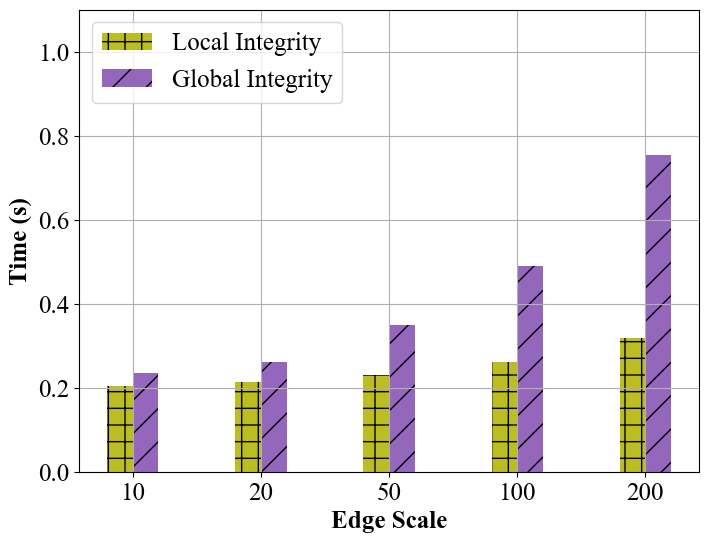

In [10]:
import matplotlib.pyplot as plt
import json

# Load json file
with open('eval/edge_scale_vs_time.json', 'r') as f:
    data = json.load(f)

n_rounds = len(list(data['l_verdicts'].values())[0])
ns = data['l_verdicts'].keys()

# Get average local and global time
l_avg = {}
g_avg = {}
for n in ns:
    l_avgs = []
    g_avgs = []
    for r in range(n_rounds):
        l_data = [i for i in data['l_times'][str(n)][r] if i > 0]
        if len(l_data) != 0:
            l_avgs.append(sum(l_data)/len(l_data))
        if not any(data['g_verdicts'][str(n)][r]):
            continue
        g_data = [i for i in data['g_times'][str(n)][r] if i > 0]
        if len(g_data) != 0:
            g_avgs.append(sum(g_data)/len(g_data))
    l_avg[n] = sum(l_avgs)/len(l_avgs) if len(l_avgs) > 0 else 0
    g_avg[n] = sum(g_avgs)/len(g_avgs) if len(g_avgs) > 0 else 0

# Plot column chart
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
b1 = ax.bar([i for i in range(len(ns))], [l_avg[n] for n in ns], color='tab:olive', width=0.2, align='center', label='Local Integrity')
b2 = ax.bar([i+0.2 for i in range(len(ns))], [g_avg[n] for n in ns], color='tab:purple', width=0.2, align='center', label='Global Integrity')
for bar in b1:
    bar.set_hatch('+')
for bar in b2:
    bar.set_hatch('/')
ax.set_xticks([i+0.1 for i in range(len(ns))])
ax.set_xticklabels(ns)
ax.set_xlabel('Edge Scale', fontdict={'fontweight': 'bold'})
ax.set_ylabel('Time (s)', fontdict={'fontweight': 'bold'})
ax.set_ylim(0, 1.1)
ax.grid(which='major')
ax.legend(loc='upper left')

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/edge_scale_vs_time.pdf", format="pdf", bbox_inches="tight")
plt.show()


### Replica Size vs Time

In [8]:
from Simulator import Simulator
import json

n_rounds = 100
rss = [64, 128, 256, 512, 1024]

l_times = {}
g_times = {}
l_verdicts = {}
g_verdicts = {}
for rs in rss:
    l_times[rs] = []
    g_times[rs] = []
    l_verdicts[rs] = []
    g_verdicts[rs] = []
    for i in range(n_rounds):
        simulator = Simulator(replica_size=rs)
        metrics = simulator.run()
        l_times[rs].append(metrics['duration']['local'])
        g_times[rs].append(metrics['duration']['global'])
        l_verdicts[n].append(metrics['integrity']['l_verdicts'])
        g_verdicts[n].append(metrics['integrity']['g_verdicts'])

with open('eval/replica_size_vs_time.json', 'w') as f:
    json.dump({'l_times': l_times, 
               'g_times': g_times, 
               'l_verdicts': l_verdicts,
               'g_verdicts': g_verdicts}, f)

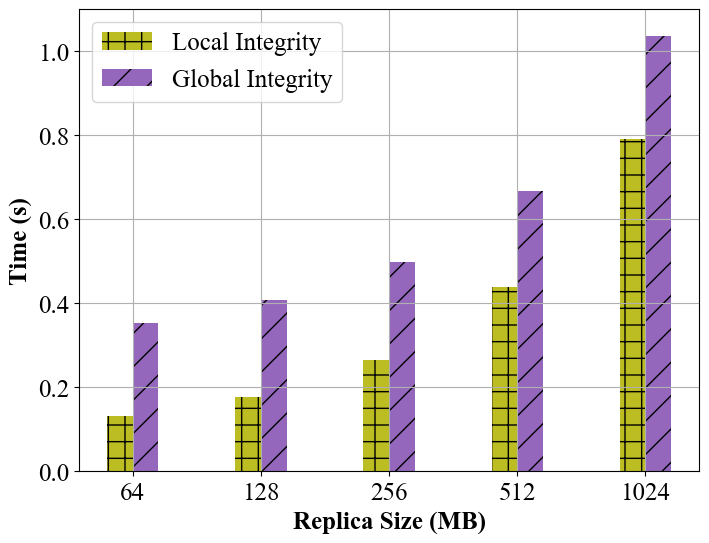

In [11]:
import matplotlib.pyplot as plt
import json

# Load json file
with open('eval/replica_size_vs_time.json', 'r') as f:
    data = json.load(f)

n_rounds = len(list(data['l_verdicts'].values())[0])
rss = data['l_verdicts'].keys()

# Get average local and global time
l_avg = {}
g_avg = {}
for rs in rss:
    l_avgs = []
    g_avgs = []
    for r in range(n_rounds):
        l_data = [i for i in data['l_times'][str(rs)][r] if i > 0]
        if len(l_data) != 0:
            l_avgs.append(sum(l_data)/len(l_data))
        if not any(data['g_verdicts'][str(rs)][r]):
            continue
        g_data = [i for i in data['g_times'][str(rs)][r] if i > 0]
        if len(g_data) != 0:
            g_avgs.append(sum(g_data)/len(g_data))
    l_avg[rs] = sum(l_avgs)/len(l_avgs) if len(l_avgs) > 0 else 0
    g_avg[rs] = sum(g_avgs)/len(g_avgs) if len(g_avgs) > 0 else 0

# Plot column chart
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
b1 = ax.bar([i for i in range(len(rss))], [l_avg[rs] for rs in rss], color='tab:olive', width=0.2, align='center', label='Local Integrity')
b2 = ax.bar([i+0.2 for i in range(len(rss))], [g_avg[rs] for rs in rss], color='tab:purple', width=0.2, align='center', label='Global Integrity')
for bar in b1:
    bar.set_hatch('+')
for bar in b2:
    bar.set_hatch('/')
ax.set_xticks([i+0.1 for i in range(len(rss))])
ax.set_xticklabels(rss)
ax.set_xlabel('Replica Size (MB)', fontdict={'fontweight': 'bold'})
ax.set_ylabel('Time (s)', fontdict={'fontweight': 'bold'})
ax.grid(which='major')
ax.set_ylim(0, 1.1)
ax.legend(loc='upper left') # move legend to middle

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/replica_size_vs_time.pdf", format="pdf", bbox_inches="tight")
plt.show()


### Corruption Rate vs Time

In [ ]:
from Simulator import Simulator
import json

n_rounds = 100
crs = [0, 0.05, 0.1, 0.15, 0.2]

l_times = {}
g_times = {}
l_verdicts = {}
g_verdicts = {}
for cr in crs:
    l_times[cr] = []
    g_times[cr] = []
    l_verdicts[cr] = []
    g_verdicts[cr] = []
    for i in range(n_rounds):
        simulator = Simulator(corruption_rate=cr)
        metrics = simulator.run()
        l_times[cr].append(metrics['duration']['l_times'])
        g_times[cr].append(metrics['duration']['g_times'])
        l_verdicts[cr].append(metrics['integrity']['l_verdicts'])
        g_verdicts[cr].append(metrics['integrity']['g_verdicts'])

with open('eval/corruption_rate_vs_time.json', 'w') as f:
    json.dump({'l_times': l_times, 
               'g_times': g_times, 
               'l_verdicts': l_verdicts, 
               'g_verdicts': g_verdicts}, f)

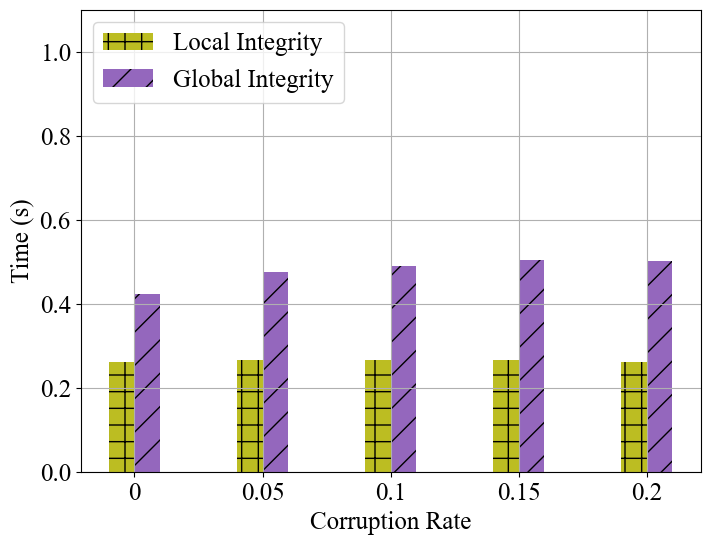

In [12]:
import matplotlib.pyplot as plt
import json

# Load json file
with open('eval/corruption_rate_vs_time.json', 'r') as f:
    data = json.load(f)

n_rounds = len(list(data['l_verdicts'].values())[0])
crs = data['l_verdicts'].keys()

# Get average local and global time
l_avg = {}
g_avg = {}
for cr in crs:
    l_avgs = []
    g_avgs = []
    for r in range(n_rounds):
        l_data = [i for i in data['l_times'][str(cr)][r] if i > 0]
        if len(l_data) != 0:
            l_avgs.append(sum(l_data)/len(l_data))
        if not any(data['g_verdicts'][str(cr)][r]):
            continue
        g_data = [i for i in data['g_times'][str(cr)][r] if i > 0]
        if len(g_data) != 0:
            g_avgs.append(sum(g_data)/len(g_data))
    l_avg[cr] = sum(l_avgs)/len(l_avgs) if len(l_avgs) > 0 else 0
    g_avg[cr] = sum(g_avgs)/len(g_avgs) if len(g_avgs) > 0 else 0

# Plot column chart
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
b1 = ax.bar([i for i in range(len(crs))], [l_avg[cr] for cr in crs], color='tab:olive', width=0.2, align='center', label='Local Integrity')
b2 = ax.bar([i+0.2 for i in range(len(crs))], [g_avg[cr] for cr in crs], color='tab:purple', width=0.2, align='center', label='Global Integrity')
for bar in b1:
    bar.set_hatch('+')
for bar in b2:
    bar.set_hatch('/')
ax.set_xticks([i+0.1 for i in range(len(crs))])
ax.set_xticklabels(crs)
ax.set_xlabel('Corruption Rate')
ax.set_ylabel('Time (s)')
ax.grid(which='major')
ax.set_ylim(0, 1.1)
ax.legend(loc='upper left')

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/corruption_rate_vs_time.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Local Integrity vs Global Integrity Time Consumption

In [4]:
from Simulator import Simulator
import json

n_rounds = 1

l_times = []
g_times = []
l_verdicts = []
g_verdicts = []
for i in range(n_rounds):
    simulator = Simulator()
    metrics = simulator.run()
    l_times.append(metrics['duration']['l_times'])
    g_times.append(metrics['duration']['g_times'])
    l_verdicts.append(metrics['integrity']['l_verdicts'])
    g_verdicts.append(metrics['integrity']['g_verdicts'])

with open('eval/local_global_time_comparison.json', 'w') as f:
    json.dump({'l_times': l_times, 
               'g_times': g_times, 
               'l_verdicts': l_verdicts, 
               'g_verdicts': g_verdicts}, f)

### Cluster Method vs Time

In [ ]:
from Simulator import Simulator
import json

n_rounds = 100
cms = ["RecursiveSpectralClustering", "SpectralClustering", "RandomClustering", "Broadcasting", "Unicasting"]

l_times = {}
g_times = {}
l_verdicts = {}
g_verdicts = {}
for cm in cms:
    l_times[cm] = []
    g_times[cm] = []
    l_verdicts[cm] = []
    g_verdicts[cm] = []
    for i in range(n_rounds):
        if cm == "Broadcasting":
            simulator = Simulator(n_clusters=100)
        elif cm == "Unicasting":
            simulator = Simulator(n_clusters=1)
        else:
            simulator = Simulator(cluster_method=cm)
        metrics = simulator.run()
        l_times[cm].append(metrics['duration']['l_times'])
        g_times[cm].append(metrics['duration']['g_times'])
        l_verdicts[cm].append(metrics['integrity']['l_verdicts'])
        g_verdicts[cm].append(metrics['integrity']['g_verdicts'])

with open('eval/cluster_method_vs_time.json', 'w') as f:
    json.dump({'l_times': l_times, 
               'g_times': g_times, 
               'l_verdicts': l_verdicts, 
               'g_verdicts': g_verdicts}, f)

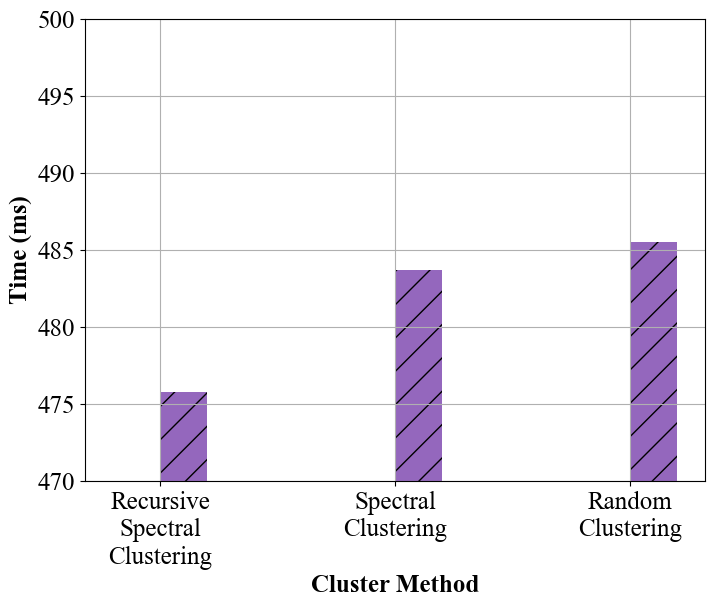

In [7]:
import matplotlib.pyplot as plt
import json

# Load json file
with open('eval/cluster_method_vs_time.json', 'r') as f:
    data = json.load(f)

n_rounds = len(list(data['l_verdicts'].values())[0])
cms = list(data['l_verdicts'].keys())[:-2]

# Get average local and global time
l_avg = {}
g_avg = {}
for cm in cms:
    l_avgs = []
    g_avgs = []
    for r in range(n_rounds):
        l_data = [i for i in data['l_times'][str(cm)][r] if i > 0]
        if len(l_data) != 0:
            l_avgs.append(sum(l_data)/len(l_data))
        # if not any(data['g_verdicts'][str(cm)][r]):
        #     continue
        g_data = [i for i in data['g_times'][str(cm)][r] if i > 0]
        if len(g_data) != 0:
            g_avgs.append(sum(g_data)/len(g_data))
    l_avg[cm] = sum(l_avgs)/len(l_avgs) if len(l_avgs) > 0 else 0
    g_avg[cm] = sum(g_avgs)/len(g_avgs) if len(g_avgs) > 0 else 0

# Plot column chart
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
b1 = ax.bar([i for i in range(len(cms))], [l_avg[cm] for cm in cms], color='tab:olive', width=0.2, align='center', label='Local Integrity')
b2 = ax.bar([i+0.2 for i in range(len(cms))], [g_avg[cm]*1000 for cm in cms], color='tab:purple', width=0.2, align='center', label='Global Integrity')
for bar in b1:
    bar.set_hatch('+')
for bar in b2:
    bar.set_hatch('/')
ax.set_xticks([i+0.1 for i in range(len(cms))])
ax.set_xticklabels(["Recursive\nSpectral\nClustering", "Spectral\nClustering", "Random\nClustering"], rotation=0)
ax.set_xlabel('Cluster Method', fontdict={'fontweight': 'bold'})
ax.set_ylabel('Time (ms)', fontdict={'fontweight': 'bold'})
ax.set_ylim(470, 500)
ax.grid(which='major')
# ax.legend()

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/cluster_method_vs_time.pdf", format="pdf", bbox_inches="tight")
plt.show()


### Number of Clusters vs Time

In [ ]:
from Simulator import Simulator
import json

n_rounds = 5
ncs = range(1, 101)

l_times = {}
g_times = {}
for nc in ncs:
    l_times[nc] = []
    g_times[nc] = []
    for i in range(n_rounds):
        simulator = Simulator(edge_scale=100,
                              replica_size=64, 
                              corruption_rate=0,
                              n_clusters=nc,
                              cluster_method="RecursiveSpectralClustering",
                              dt1=0.3,
                              dt2=0.3,
                              dt3=0.2)
        metrics = simulator.run()
        l_times[nc].append(metrics['duration']['local'])
        g_times[nc].append(metrics['duration']['global'])

with open('data/n_clusters_vs_time.json', 'w') as f:
    json.dump({'local': l_times, 'global': g_times}, f)

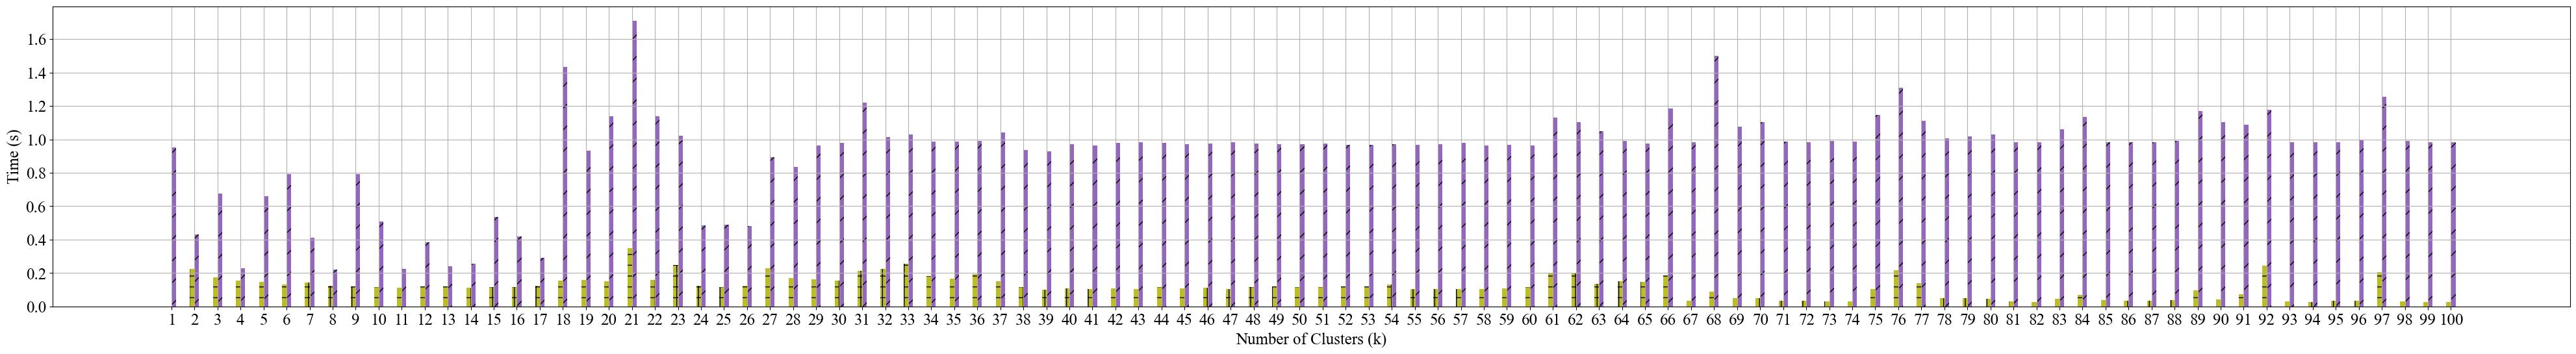

In [4]:
import matplotlib.pyplot as plt
import json

n_rounds = 5
ncs = range(1, 101)

# load json file as dic
with open('data/n_clusters_vs_time.json', 'r') as f:
    data = json.load(f)

# get average local and global time
l_avg = {}
g_avg = {}
for nc in ncs:
    l_avgs = []
    g_avgs = []
    for r in range(n_rounds):
        l_data = [i for i in data['local'][str(nc)][r] if i > 0]
        if len(l_data) != 0:
            l_avgs.append(sum(l_data)/len(l_data))
        g_data = [i for i in data['global'][str(nc)][r] if i > 0]
        if len(g_data) != 0:
            g_avgs.append(sum(g_data)/len(g_data))
    l_avg[nc] = sum(l_avgs)/len(l_avgs) if len(l_avgs) > 0 else 0
    g_avg[nc] = sum(g_avgs)/len(g_avgs) if len(g_avgs) > 0 else 0

# plot a column chart
fig = plt.figure(figsize=(50,6))
ax = fig.add_subplot(111)
b1 = ax.bar([i for i in range(len(ncs))], [l_avg[nc] for nc in ncs], color='tab:olive', width=0.2, align='center', label='Local Integrity')
b2 = ax.bar([i+0.2 for i in range(len(ncs))], [g_avg[nc] for nc in ncs], color='tab:purple', width=0.2, align='center', label='Global Integrity')
for bar in b1:
    bar.set_hatch('+')
for bar in b2:
    bar.set_hatch('/')
ax.set_xticks([i+0.1 for i in range(len(ncs))])
ax.set_xticklabels(ncs)
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Time (s)')
ax.grid(which='major')
# ax.legend()

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/n_clusters_vs_time.pdf", format="pdf", bbox_inches="tight")
plt.show()


### Number of Malicious Servers vs Time (average over 10 rounds for each number)

### Time Thresholds vs Time

### Comparision with Other Works

In [ ]:
# edge_scale = 100, replica_scale = 64, replica_size = 256, corruption_rate = 0.1
# edi-v
# cooper
# edgewatch

## Success Rate

### Number of Clusters vs Success Rate

In [ ]:
from Simulator import Simulator
import json

n_rounds = 100
n = 100
ncs = range(1, n+1)

l_times = {}
g_times = {}
l_verdicts = {}
g_verdicts = {}
for nc in ncs:
    l_times[nc] = []
    g_times[nc] = []
    l_verdicts[nc] = []
    g_verdicts[nc] = []
    for i in range(n_rounds):
        simulator = Simulator(edge_scale=n, n_clusters=nc)
        metrics = simulator.run()
        l_times[nc].append(metrics['duration']['l_times'])
        g_times[nc].append(metrics['duration']['g_times'])
        l_verdicts[nc].append(metrics['integrity']['l_verdicts'])
        g_verdicts[nc].append(metrics['integrity']['g_verdicts'])

with open('eval/nclusters_vs_success_rate.json', 'w') as f:
    json.dump({'l_times': l_times, 
               'g_times': g_times, 
               'l_verdicts': l_verdicts, 
               'g_verdicts': g_verdicts}, f)

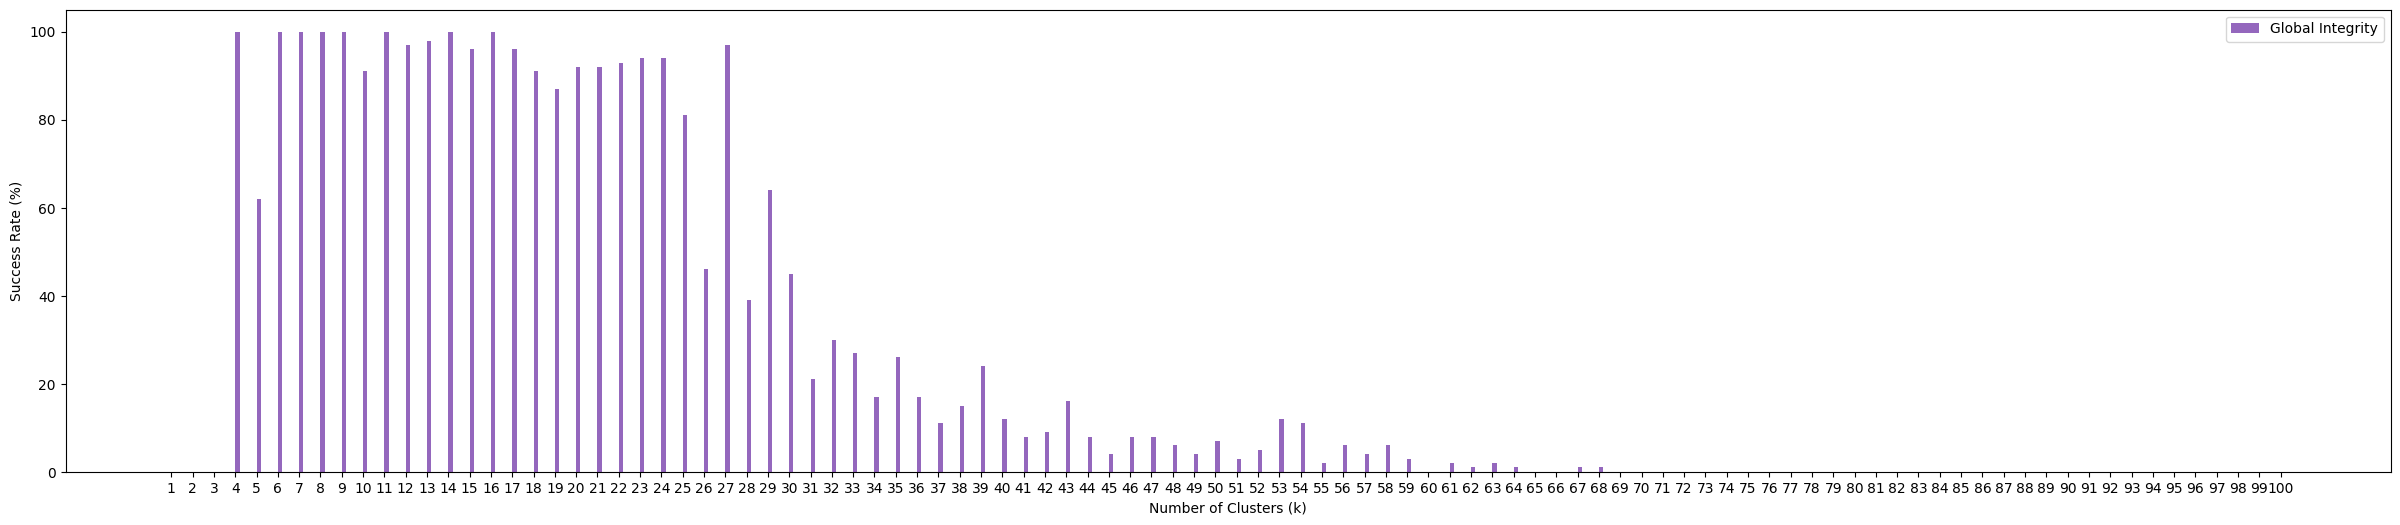

In [1]:
import matplotlib.pyplot as plt
import json

# Load json file
with open('eval/nclusters_vs_success_rate.json', 'r') as f:
    data = json.load(f)

n_rounds = len(list(data['l_verdicts'].values())[0])
ncs = data['l_verdicts'].keys()
n = len(ncs)

# Get average local and global verdicts
l_avg = {}
g_avg = {}
for nc in ncs:
    l_avgs = []
    g_avgs = []
    for r in range(n_rounds):
        l_data = [i for i in data['l_verdicts'][str(nc)][r]]
        if len(l_data) != 0:
            l_avgs.append(len([i for i in l_data if i == True])/len(l_data))
        # if not any(data['g_verdicts'][str(n)][r]):
        #     continue
        g_data = [i for i in data['g_verdicts'][str(nc)][r]]
        if len(g_data) != 0:
            g_avgs.append(len([i for i in g_data if i == True])/len(g_data))
    l_avg[nc] = sum(l_avgs)*100/len(l_avgs) 
    g_avg[nc] = sum(g_avgs)*100/len(g_avgs)

# Plot column chart
fig = plt.figure(figsize=(30,6))
ax = fig.add_subplot(111)
# b1 = ax.bar([i for i in range(len(ncs))], [l_avg[nc] for nc in ncs], color='tab:olive', width=0.2, align='center', label='Local Integrity')
b2 = ax.bar([i+0.2 for i in range(len(ncs))], [g_avg[nc] for nc in ncs], color='tab:purple', width=0.2, align='center', label='Global Integrity')
# for bar in b1:
#     bar.set_hatch('+')
# for bar in b2:
#     bar.set_hatch('/')
ax.set_xticks([i+0.1 for i in range(len(ncs))])
ax.set_xticklabels(ncs)
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Success Rate (%)')
# ax.grid(which='major')
ax.legend()

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/nclusters_vs_success_rate.pdf", format="pdf", bbox_inches="tight")
plt.show()


### Corruption Rate vs Success Rate

In [67]:
from Simulator import Simulator
import json

n_rounds = 10
crs = [0, 0.05, 0.1, 0.15, 0.2]

l_times = {}
g_times = {}
l_verdicts = {}
g_verdicts = {}
for cr in crs:
    l_times[cr] = []
    g_times[cr] = []
    l_verdicts[cr] = []
    g_verdicts[cr] = []
    for i in range(n_rounds):
        simulator = Simulator(edge_scale=100,
                              replica_size=64, 
                              corruption_rate=cr,
                              n_clusters=33,
                              dt1=0.2,
                              dt2=0.2,
                              dt3=0.1)
        metrics = simulator.run()
        l_times[cr].append(metrics['duration']['l_times'])
        g_times[cr].append(metrics['duration']['g_times'])
        l_verdicts[cr].append(metrics['integrity']['l_verdicts'])
        g_verdicts[cr].append(metrics['integrity']['g_verdicts'])

with open('data/corruption_rate_vs_success_rate.json', 'w') as f:
    json.dump({'l_times': l_times, 
               'g_times': g_times, 
               'l_verdicts': l_verdicts, 
               'g_verdicts': g_verdicts}, f)

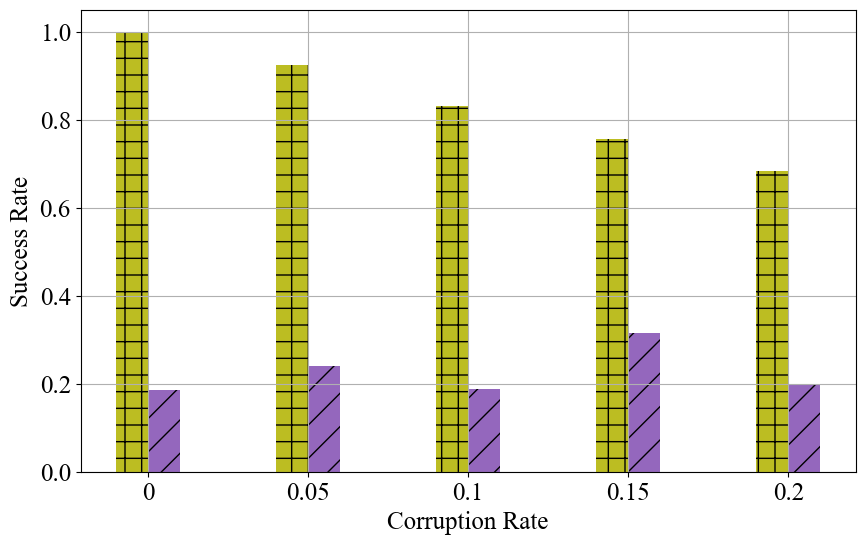

In [6]:
import matplotlib.pyplot as plt
import json

# Load json file as dictionary
with open('data/corruption_rate_vs_success_rate.json', 'r') as f:
    data = json.load(f)

n_rounds = len(list(data['l_verdicts'].values())[0])
crs = data['l_verdicts'].keys()

# Get average local and global verdicts
l_avg = {}
g_avg = {}
for cr in crs:
    l_avgs = []
    g_avgs = []
    for r in range(n_rounds):
        l_data = [i for i in data['l_verdicts'][str(cr)][r]]
        if len(l_data) != 0:
            l_avgs.append(len([i for i in l_data if i == True])/len(l_data))
        g_data = [i for i in data['g_verdicts'][str(cr)][r]]
        if len(g_data) != 0:
            g_avgs.append(len([i for i in g_data if i == True])/len(g_data))
    l_avg[cr] = sum(l_avgs)/len(l_avgs) 
    g_avg[cr] = sum(g_avgs)/len(g_avgs)

# Plot column chart
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
b1 = ax.bar([i for i in range(len(crs))], [l_avg[cr] for cr in crs], color='tab:olive', width=0.2, align='center', label='Local Integrity')
b2 = ax.bar([i+0.2 for i in range(len(crs))], [g_avg[cr] for cr in crs], color='tab:purple', width=0.2, align='center', label='Global Integrity')
for bar in b1:
    bar.set_hatch('+')
for bar in b2:
    bar.set_hatch('/')
ax.set_xticks([i+0.1 for i in range(len(crs))])
ax.set_xticklabels(crs)
ax.set_xlabel('Corruption Rate')
ax.set_ylabel('Success Rate')
ax.grid(which='major')
# ax.legend()

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/corruption_rate_vs_success_rate.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Communication Overhead

### Edge Scale vs Communication Overhead


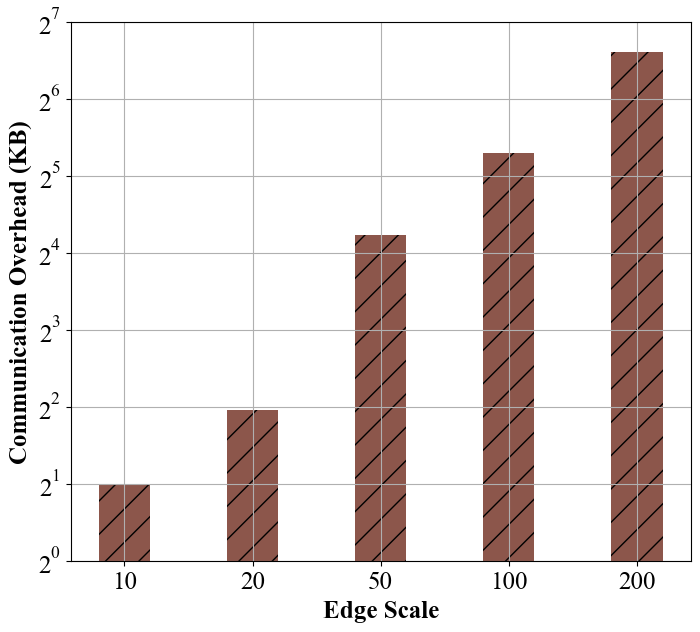

In [25]:
import matplotlib.pyplot as plt

PROOF_SIZE = 56

ns = [10, 20, 50, 100, 200]
ks = [4, 5, 12, 17, 27]

comm_overhead = {}
for i in range(len(ns)):
    n = ns[i]
    k = ks[i]
    comm_overhead[n] = 2*(PROOF_SIZE*(n-k)+(PROOF_SIZE+1)*k*(k-1))/1024

# draw a bar chart
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
b = ax.bar([i for i in range(len(ns))], [comm_overhead[n] for n in ns], color='tab:brown', width=0.4, align='center')
for bar in b:
    bar.set_hatch('/')
ax.set_xticks([i for i in range(len(ns))])
ax.set_xticklabels(ns)
ax.set_xlabel('Edge Scale', fontdict={'fontweight': 'bold'})
ax.set_ylabel('Communication Overhead (KB)', fontdict={'fontweight': 'bold'})
ax.set_yscale('log', base=2)
ax.yaxis.set_ticks([2**i for i in range(0, 8)], minor=True)
ax.grid(which='major')

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/edge_scale_vs_comm_overhead.pdf", format="pdf", bbox_inches="tight")
plt.show()


### Replica Scale vs Communication Overhead

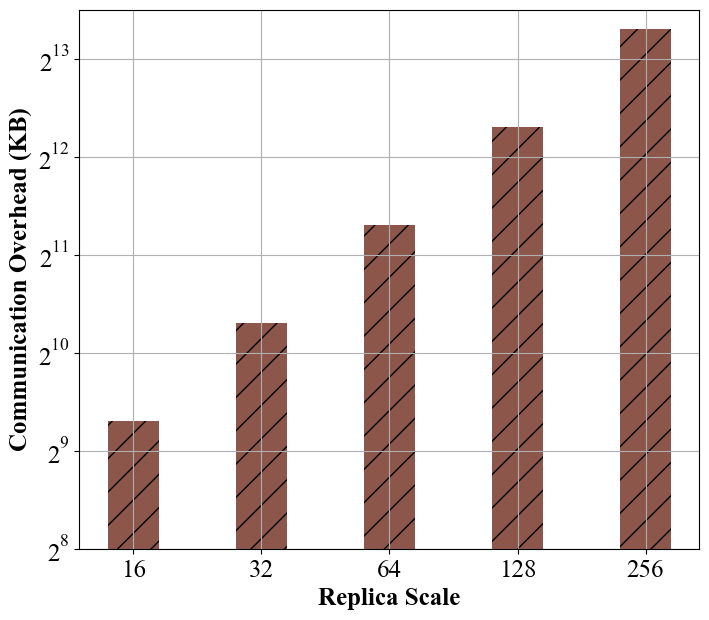

In [14]:
import matplotlib.pyplot as plt

PROOF_SIZE = 56

n = 100
k = 17
rss = [16, 32, 64, 128, 256]

comm_overhead = {}
for rs in rss:
    comm_overhead[rs] = rs*2*(PROOF_SIZE*(n-k)+(PROOF_SIZE+1)*k*(k-1))/(1024)

# draw a bar chart
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
b = ax.bar([i for i in range(len(rss))], [comm_overhead[rs] for rs in rss], color='tab:brown', width=0.4, align='center')
for bar in b:
    bar.set_hatch('/')
ax.set_xticks([i for i in range(len(rss))])
ax.set_xticklabels(rss)
ax.set_xlabel('Replica Scale', fontdict={'fontweight': 'bold'})
ax.set_ylabel('Communication Overhead (KB)', fontdict={'fontweight': 'bold'})
ax.grid(which='major')
ax.set_yscale('log', base=2)
ax.yaxis.set_ticks([2**i for i in range(8, 14)], minor=True)

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/replica_scale_vs_comm_overhead.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Replica Size vs Communication Overhead

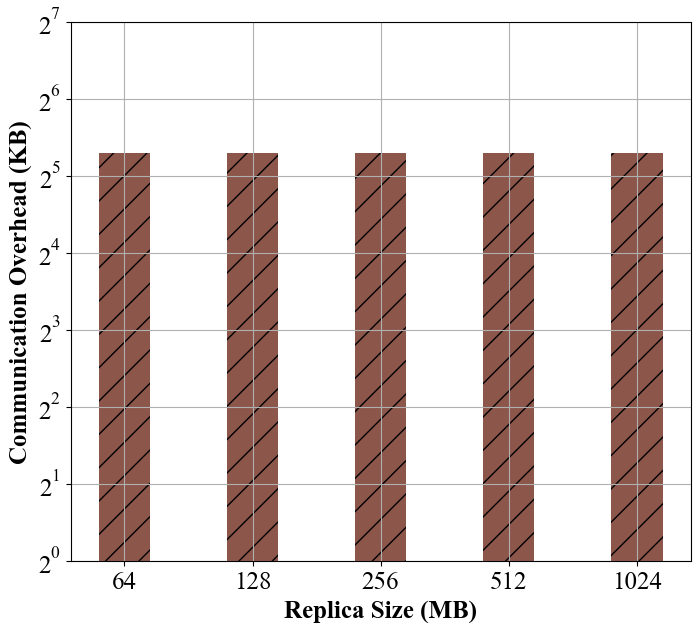

In [24]:
import matplotlib.pyplot as plt

PROOF_SIZE = 56

n = 100
k = 17
rss = [64, 128, 256, 512, 1024]

comm_overhead = {}
for rs in rss:
    comm_overhead[rs] = 2*(PROOF_SIZE*(n-k)+(PROOF_SIZE+1)*k*(k-1))/1024

# draw a bar chart
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
b = ax.bar([i for i in range(len(rss))], [comm_overhead[rs] for rs in rss], color='tab:brown', width=0.4, align='center')
for bar in b:
    bar.set_hatch('/')
ax.set_xticks([i for i in range(len(rss))])
ax.set_xticklabels(rss)
ax.set_xlabel('Replica Size (MB)', fontdict={'fontweight': 'bold'})
ax.set_ylabel('Communication Overhead (KB)', fontdict={'fontweight': 'bold'})
ax.grid(which='major')
ax.set_yscale('log', base=2)
ax.yaxis.set_ticks([2**i for i in range(0, 8)], minor=True)

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/replica_size_vs_comm_overhead.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Number of Clusters vs Communication Overhead

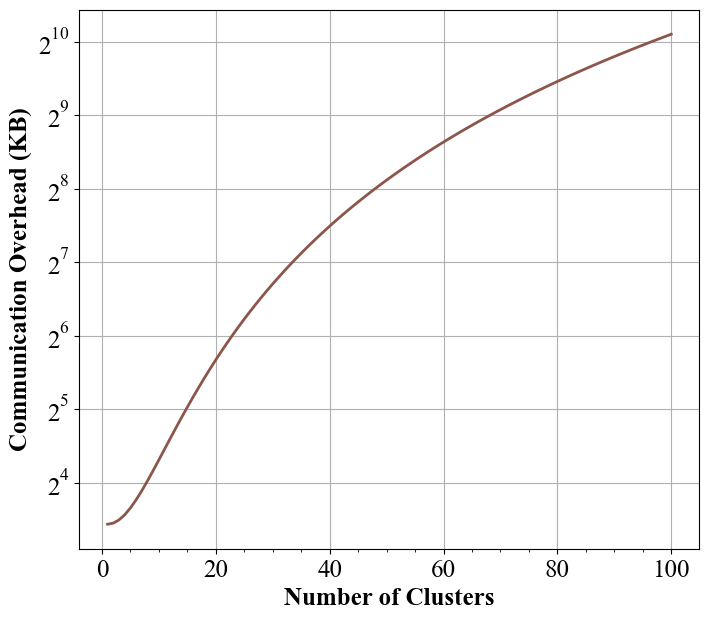

In [16]:
import matplotlib.pyplot as plt

PROOF_SIZE = 56

n = 100

comm_overhead = {}
for k in range(1, n+1):
    comm_overhead[k] = 2*(PROOF_SIZE*(n-k)+(PROOF_SIZE+1)*k*(k-1))/1024

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
ax.plot([k for k in range(1, n+1)], [comm_overhead[k] for k in range(1, n+1)], color='tab:brown', linestyle='-', linewidth=2)
ax.set_xlabel('Number of Clusters', fontdict={'fontweight': 'bold'})
ax.set_ylabel('Communication Overhead (KB)', fontdict={'fontweight': 'bold'})
ax.grid(which='major')
ax.set_yscale('log', base=2)
ax.minorticks_on()

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/n_clusters_vs_comm_overhead.pdf", format="pdf", bbox_inches="tight")
plt.show()